## Simple Iris Dataset KNN 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
import sklearn.datasets
import sklearn.cross_validation
import sklearn.grid_search
import sklearn.metrics
import sklearn.neighbors
import sklearn.decomposition
import warnings
warnings.filterwarnings("ignore")

iris=sklearn.datasets.load_iris()

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
print(iris.target.shape)
print(iris.data.shape)

X=iris.data
Y=iris.target

(150,)
(150, 4)


In [3]:
#Get training vs testing data
X_train, X_test, Y_train, Y_test=sklearn.cross_validation.train_test_split\
(X, Y, test_size=0.33, random_state=42)

#print(type(Y[1]))
#print(X_train)
#print(X_train.shape)
#print(X_test.shape)
#print(Y_train.shape)
#print(Y_test.shape)

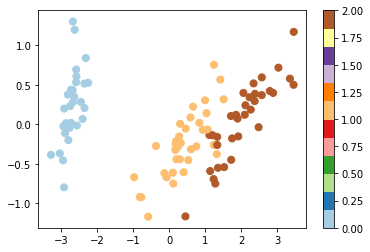

In [4]:
X_norm=np.mean(X_train, axis=0)
X_train_norm=X_train-X_norm
X_test_norm=X_test-X_norm

#SVD (singular value decomposition) dimensionality reduction is a linear demonsionality reduction method
#Unlike PCA, it does not center the data beforehand. But we mean normalized it
#AKA LSA (latent semantic analysis)
svd=sklearn.decomposition.TruncatedSVD(n_components=2) #components= desired dimensionality output
X_2d=svd.fit_transform(X_train_norm)

#Scatter plot of projections for first 2 principal components
plt.scatter(X_2d[:,0], X_2d[:,1],  c=Y_train, s=50, cmap=plt.cm.Paired)
plt.colorbar()
plt.show()

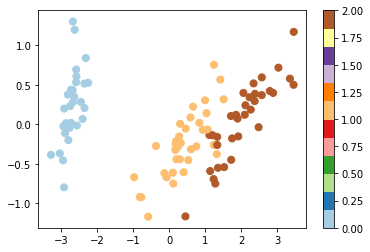

In [5]:
svd=sklearn.decomposition.TruncatedSVD(n_components=3) #components= desired dimensionality output
#Basically turn the matrix for X in the dot product of other matrices!!! (3 in this case)
X_2d=svd.fit_transform(X_train_norm)

#Scatter plot of projections for first 4 principal components
plt.scatter(X_2d[:,0], X_2d[:,1],  c=Y_train, s=50, cmap=plt.cm.Paired)
plt.colorbar()
plt.show()

In [6]:
#Do the same as above but with PCA function
#This automatically centers the data
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X_train)
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1
print(d)
print(pca.explained_variance_ratio_)
pca=PCA(n_components=2)
X_reduced=pca.fit_transform(X_train)
X_recovered=pca.inverse_transform(X_reduced)
print(X_reduced)

2
[ 0.92028126  0.05469874  0.01989892  0.00512108]
[[ 0.32162468 -0.23514355]
 [ 3.35539648  0.5785419 ]
 [ 0.60606939 -0.31558249]
 [-2.7278472   0.43833826]
 [ 3.45557695  0.50119426]
 [ 0.17944642 -0.25008611]
 [-2.68432384  0.43730877]
 [-2.81479204  0.37689792]
 [-2.24851392  0.52692508]
 [-0.58312919 -1.16837984]
 [ 1.3334091  -0.15788395]
 [-2.40389936  0.06853405]
 [-2.56044498 -0.01512285]
 [-2.35107345  0.20594267]
 [ 0.29795478 -0.44229601]
 [-2.63562005  0.34988092]
 [ 0.27943683 -0.15361038]
 [ 3.46053884  1.17085571]
 [-2.89252147 -0.11166616]
 [ 0.59176174  0.08761556]
 [ 1.28196087 -0.75020061]
 [-2.62654975  1.19755411]
 [ 1.11722967 -0.13573213]
 [ 1.35567008 -0.54997231]
 [ 0.20073728 -0.44126369]
 [ 0.5322583  -0.45231148]
 [ 1.85607566  0.10349674]
 [ 0.11630185 -0.75010974]
 [-2.31563377  0.83953924]
 [-0.77420131 -0.92207119]
 [ 1.74832201 -0.17791205]
 [-2.75151711  0.2311858 ]
 [-2.91611795  0.19991851]
 [-0.13267471 -0.61831068]
 [ 1.51121711  0.31683181]
 [-

In [7]:
#Use cross-validation to estimate the best K value
#We want to optimize k for different dimensional projects

In [8]:
#I don't think we need this
def compute_test(x_test, y_test, clf, cv):
    Kfolds=sklearn.cross_validation.KFold(x_test.shape[0], n_folds=cv)
    #K-fold cross validation for supervised learning: split training data set
    # into K groups, and train data on K-1 of the groups, testing on the left out set
    #Repeat
    #Average the scores of each run
    #Before validating on the test set 
    #Can be computationally taxing but doesn't "waste" data
    scores=[]

    #Implement
    for i,j in Kfolds:
        test_set=x_test[j]
        test_labels=y_test[j]
        scores.append(sklearn.metrics.accuracy_score(test_labels, clf.predict(test_set)))
    return scores    

In [9]:
#Set different values from k (from 1 to 20 here) as neighbors 
k=np.arange(20)+1 #An array from 1 to 20
parameters={'n_neighbors': k} #A dictionary of # neighbors and the k array

#Call nearest neighbor classifier from scikitlearn
knearest=sklearn.neighbors.KNeighborsClassifier()
#GridSearch selects the best parameter k 
clf=sklearn.grid_search.GridSearchCV(knearest, parameters, cv=10)
#Using k=10 folds for cross-validation, knn classifier, and parameters

clf.fit(X_train, Y_train)
print(clf.best_params_)

accuracy=[]
params=[]
dlist=[]

no_of_dimensions=np.arange(3)+1 #This dimension is less than the number of columns we have. 
#This will be the number of dimensions we project the data down
for d in no_of_dimensions:
        svd=sklearn.decomposition.TruncatedSVD(n_components=d)
        
        if d<4:
            X_fit=svd.fit_transform(X_train)
            X_fit_atest=svd.transform(X_test)
        else:
            X_nl=X_train
            X_nl1=X_test
            
        clf.fit(X_fit, Y_train)
        
        dlist.append(d)
        accuracy.append(compute_test(x_test=X_fit_atest, y_test=Y_test, clf=clf, cv=10))
        params.append(clf.best_params_['n_neighbors'])

print(dlist)
print(accuracy) #Accuracy gets better as dimensions increase
print(params) 

{'n_neighbors': 4}
[1, 2, 3]
[[0.80000000000000004, 1.0, 1.0, 1.0, 0.80000000000000004, 1.0, 0.59999999999999998, 0.80000000000000004, 0.59999999999999998, 0.80000000000000004], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 0.80000000000000004, 1.0, 1.0, 1.0, 1.0, 0.80000000000000004]]
[18, 5, 8]


In [10]:
#We should use 4 nearest neighbors!
#We should k=5 for K-fold cross validation

from sklearn import metrics
#Call nearest neighbor classifier from scikitlearn
knn=sklearn.neighbors.KNeighborsClassifier(n_neighbors=4)
#GridSearch selects the best parameter k 
knn.fit(X_train, Y_train)
pred=knn.predict(X_test)

print (metrics.classification_report(Y_test, pred))
print (metrics.confusion_matrix(Y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       0.94      1.00      0.97        15
          2       1.00      0.94      0.97        16

avg / total       0.98      0.98      0.98        50

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
